In [66]:
%matplotlib inline

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys

if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [67]:
env = WindyGridworldEnv()

In [68]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [69]:
def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):        
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 10 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="\n")
            sys.stdout.flush()
        
        # Implement this!
        cur_state = env.reset()         
        policy_vals = policy(cur_state)        
        action = np.random.choice(len(policy_vals), p = policy_vals)
        while True:
            #Pick action according to current Q vals using epsilon greedy            
            nxt_state, reward, is_lst, prob = env.step(action)            
            policy_vals = policy(nxt_state)            
            nxt_action = np.random.choice(len(policy_vals), p = policy_vals)
            #Update Q-value function            
            TD_target = reward + discount_factor*Q[nxt_state][nxt_action]
            Q[cur_state][action] += alpha*(TD_target - Q[cur_state][action])
            #Update stats info
            stats.episode_lengths[i_episode] += 1                             
            stats.episode_rewards[i_episode] += reward
            #Update new state, action
            cur_state = nxt_state
            action = nxt_action
            if is_lst: #reach goal state
                break                        
    return Q, stats

In [70]:
def exp_sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    Expected SARSA algorithm: On(Off)-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):        
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 10 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="\n")
            sys.stdout.flush()
        
        # Implement this!
        cur_state = env.reset()                 
        while True:
            #Pick action according to current Q vals using epsilon greedy            
            policy_vals = policy(cur_state)                
            action = np.random.choice(len(policy_vals), p = policy_vals)                        
            #Take action
            nxt_state, reward, is_lst, prob = env.step(action)
            policy_vals = policy(nxt_state)                                        
            #Update Q-value function                        
            TD_target = 0
            for a in range(len(policy_vals)):
                TD_target += policy_vals[a]*Q[nxt_state][a]            
            TD_target *= discount_factor
            TD_target += reward
            Q[cur_state][action] += alpha*(TD_target - Q[cur_state][action])
            #Update stats info
            stats.episode_lengths[i_episode] += 1                             
            stats.episode_rewards[i_episode] += reward
            #Update new state, action
            cur_state = nxt_state           
            if is_lst: #reach goal state
                break                        
    return Q, stats

In [71]:
Q, stats = sarsa(env, 200)

Episode 10/200.
Episode 20/200.
Episode 30/200.
Episode 40/200.
Episode 50/200.
Episode 60/200.
Episode 70/200.
Episode 80/200.
Episode 90/200.
Episode 100/200.
Episode 110/200.
Episode 120/200.
Episode 130/200.
Episode 140/200.
Episode 150/200.
Episode 160/200.
Episode 170/200.
Episode 180/200.
Episode 190/200.
Episode 200/200.


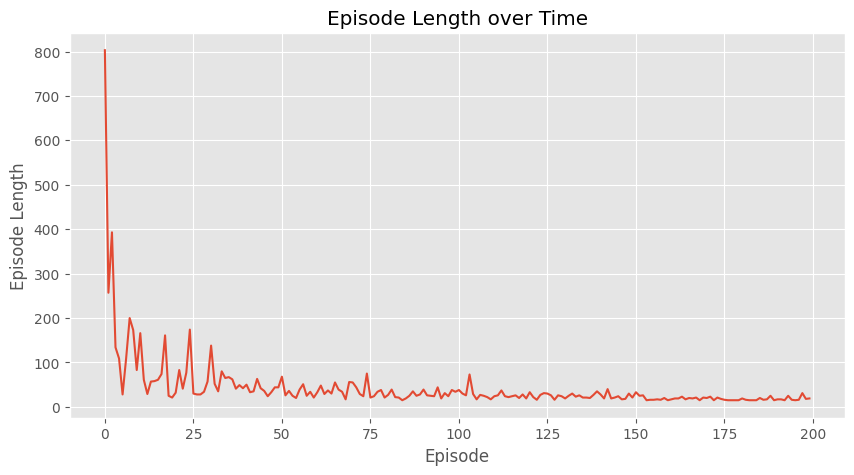

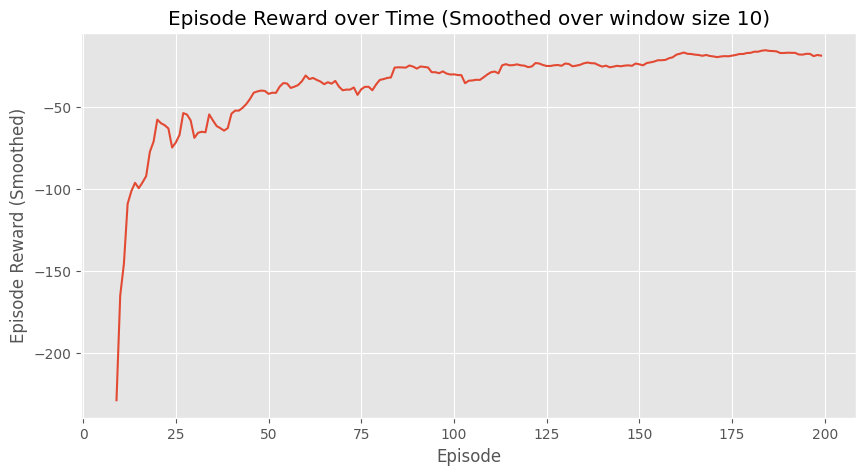

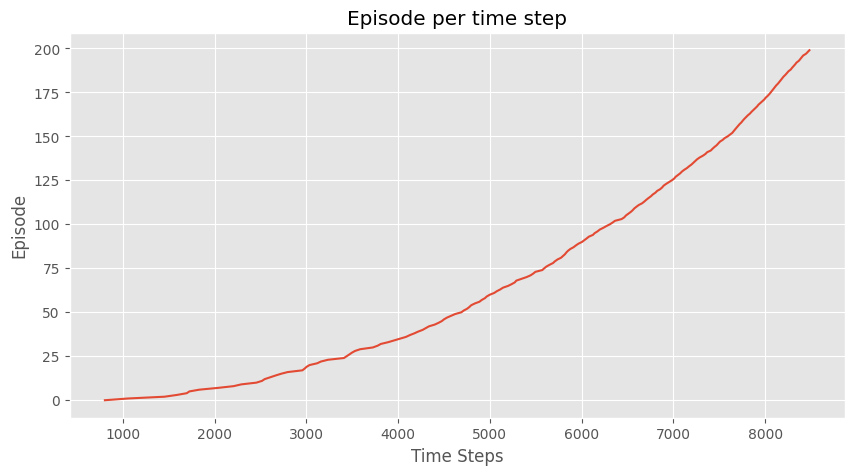

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [72]:
plotting.plot_episode_stats(stats)

In [73]:
Q, stats = exp_sarsa(env, 200)

Episode 10/200.
Episode 20/200.
Episode 30/200.
Episode 40/200.
Episode 50/200.
Episode 60/200.
Episode 70/200.
Episode 80/200.
Episode 90/200.
Episode 100/200.
Episode 110/200.
Episode 120/200.
Episode 130/200.
Episode 140/200.
Episode 150/200.
Episode 160/200.
Episode 170/200.
Episode 180/200.
Episode 190/200.
Episode 200/200.


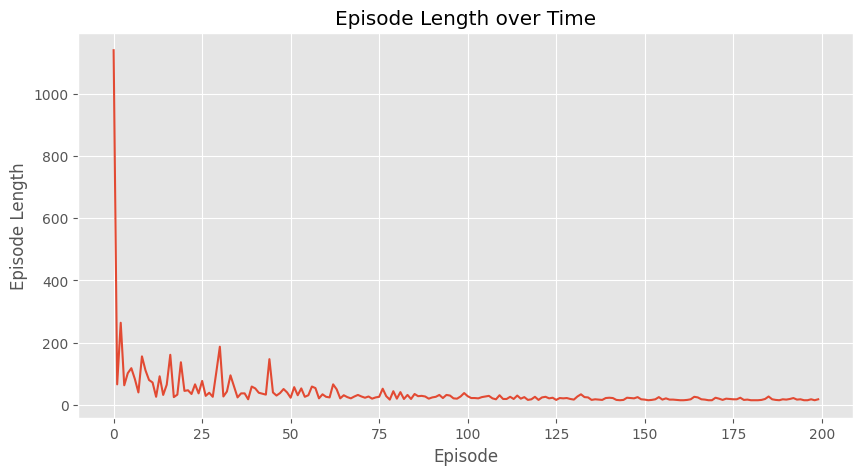

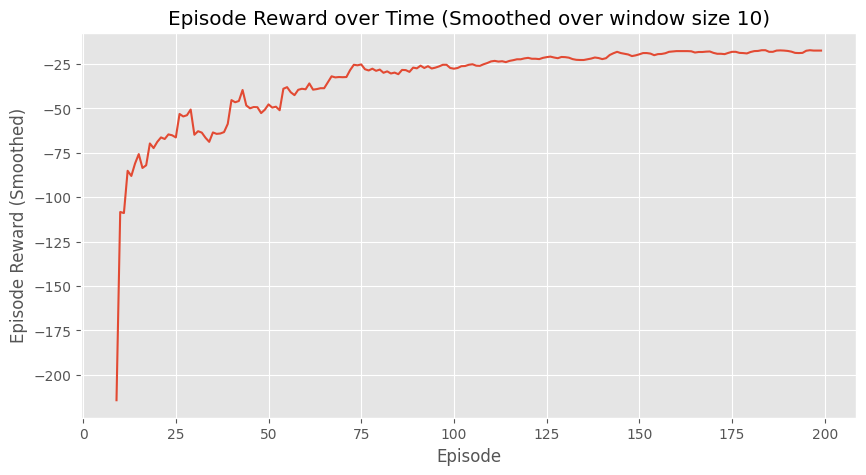

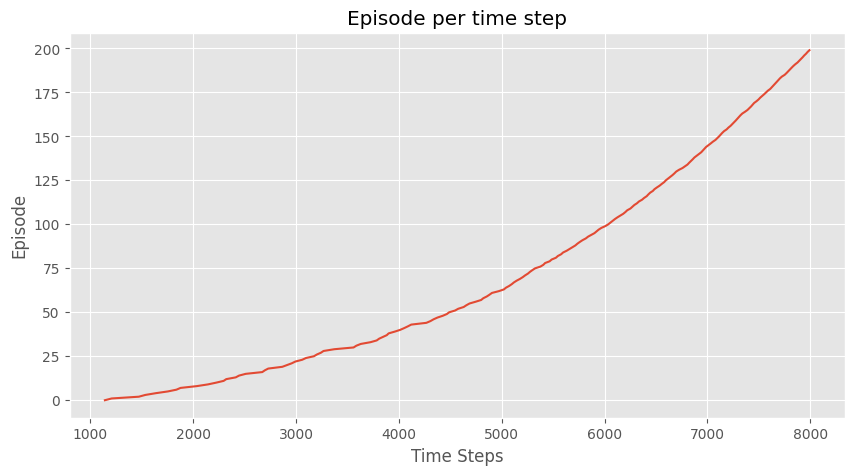

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [74]:
plotting.plot_episode_stats(stats)